# Ordinary Least Squares Assumptions

In Regression Analysis, there are several assumptions that must be accepted to make the OLS is working properly. These assumptions could be described as follows:
- Linearity
- No Endogeneity
- Homoscedasticity
- No Autocorrelation
- No Multicollinearity

### Importing all of the libraries needed

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import sklearn
from sklearn import preprocessing

sns.set()

In [2]:
import matplotlib
print("Pandas Version: ", pd.__version__)
print("NumPy Version: ", np.__version__)
print("Matplotlib Version: ", matplotlib.__version__)
print("Seaborn Version: ", sns.__version__)
print("Scikit-Learn Version: ", sklearn.__version__)

Pandas Version:  2.1.3
NumPy Version:  1.26.2
Matplotlib Version:  3.8.2
Seaborn Version:  0.13.0
Scikit-Learn Version:  1.3.2


## Load The Data

In [3]:
dataset = pd.read_csv('MELBOURNE_CLEANED_DATASET.csv')
dataset.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,2,h,870000.0,SS,Jellis,2016-09-03,2.5,3067.0,1.0,1.0,126.0,136.0,1970.0,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,2,h,1480000.0,S,Biggin,2016-12-03,2.5,3067.0,1.0,1.0,202.0,136.0,1970.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,2,h,1035000.0,S,Biggin,2016-02-04,2.5,3067.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,3,u,870000.0,VB,Rounds,2016-02-04,2.5,3067.0,2.0,1.0,0.0,136.0,1970.0,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,3,h,1465000.0,SP,Biggin,2017-03-04,2.5,3067.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


### Refining Variable Types
- Categorical Variables

In [4]:
# Identifying object column and converting it to categorical variable
print(dataset.select_dtypes(["object"]).columns)

categorical = [
    "Suburb",
    "Type",
    "Method",
    "SellerG",
    "Date",
    "CouncilArea",
    "Regionname",
]

for cat_variables in categorical:
    dataset[cat_variables] = dataset[cat_variables].astype('category')

Index(['Suburb', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')


In [5]:
# Convert data column to date object
dataset['Date'] = pd.to_datetime(dataset['Date'], format='%Y-%m-%d', dayfirst=True)
dataset['Date'].head(5)

0   2016-09-03
1   2016-12-03
2   2016-02-04
3   2016-02-04
4   2017-03-04
Name: Date, dtype: category
Categories (78, datetime64[ns]): [2016-01-28, 2016-02-04, 2016-04-16, 2016-04-23, ..., 2018-02-24, 2018-03-03, 2018-03-10, 2018-03-17]

In [6]:
# Since postal code can be converted as categorical data type, thus
postal = ['Postcode']

for postcode in postal:
    dataset[postcode] = dataset[postcode].astype('category')

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29238 entries, 0 to 29237
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         29238 non-null  category
 1   Rooms          29238 non-null  int64   
 2   Type           29238 non-null  category
 3   Price          29238 non-null  float64 
 4   Method         29238 non-null  category
 5   SellerG        29238 non-null  category
 6   Date           29238 non-null  category
 7   Distance       29238 non-null  float64 
 8   Postcode       29238 non-null  category
 9   Bathroom       29238 non-null  float64 
 10  Car            29238 non-null  float64 
 11  Landsize       29238 non-null  float64 
 12  BuildingArea   29238 non-null  float64 
 13  YearBuilt      29238 non-null  float64 
 14  CouncilArea    29238 non-null  category
 15  Lattitude      29238 non-null  float64 
 16  Longtitude     29238 non-null  float64 
 17  Regionname     29238 non-null  

In [8]:
dataset.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Suburb,29238,319,Reservoir,764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rooms,29238.0,NaN,NaN,NaN,2.832102,0.803905,1.0,2.0,3.0,3.0,4.0
Type,29238,3,h,18954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,29238.0,NaN,NaN,NaN,939008.094227,426992.266625,85000.0,670000.0,870000.0,1075000.0,3200000.0
Method,29238,9,S,16893,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SellerG,29238,351,Nelson,2850,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,29238,78,2017-10-28 00:00:00,900,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Distance,29238.0,NaN,NaN,NaN,10.732372,6.127501,0.0,6.3,10.1,13.9,35.2
Postcode,29238.0,189.0,3073.0,764.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bathroom,29238.0,NaN,NaN,NaN,1.58359,0.496084,0.0,1.0,2.0,2.0,2.0


## Linearity

Let's check our data for Linearity Assumption using Scatter Plot

I want to filter the columns that I want to set as my Independent Variables, which are:
- `Suburb`
- `Type`
- `Method`
- `CouncilArea`
- `Regionname`
  
- `Rooms`
- `Distance`
- `Bathroom`
- `Car`
- `Landsize`
- `BuildingArea`
- `YearBuilt`
- `Propertycount`

While the Dependent Variable is the `Price`

In [9]:
corr_columns = [
    "Rooms",
    "Price",
    "Distance",
    "Bathroom",
    "Car",
    "Landsize",
    "BuildingArea",
    "YearBuilt",
    "Propertycount"
]

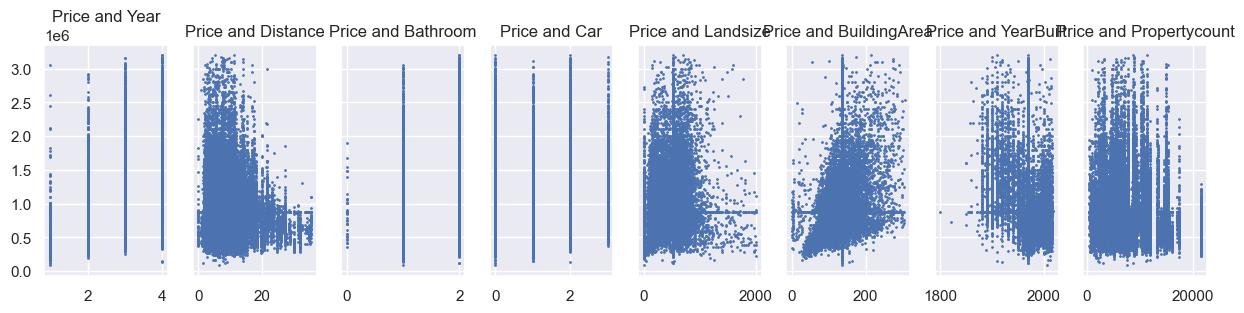

In [10]:
# sharey -> share 'Price' as y
f, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8) = plt.subplots(
    1, 8, sharey=True, figsize=(15, 3)
)

ax1.scatter(dataset["Rooms"], dataset["Price"], s=1)
ax1.set_title("Price and Year")
ax2.scatter(dataset["Distance"], dataset["Price"], s=1)
ax2.set_title("Price and Distance")
ax3.scatter(dataset["Bathroom"], dataset["Price"], s=1)
ax3.set_title("Price and Bathroom")
ax4.scatter(dataset["Car"], dataset["Price"], s=1)
ax4.set_title("Price and Car")
ax5.scatter(dataset["Landsize"], dataset["Price"], s=1)
ax5.set_title("Price and Landsize")
ax6.scatter(dataset["BuildingArea"], dataset["Price"], s=1)
ax6.set_title("Price and BuildingArea")
ax7.scatter(dataset["YearBuilt"], dataset["Price"], s=1)
ax7.set_title("Price and YearBuilt")
ax8.scatter(dataset["Propertycount"], dataset["Price"], s=1)
ax8.set_title("Price and Propertycount")

plt.show()

#### Pair Plot

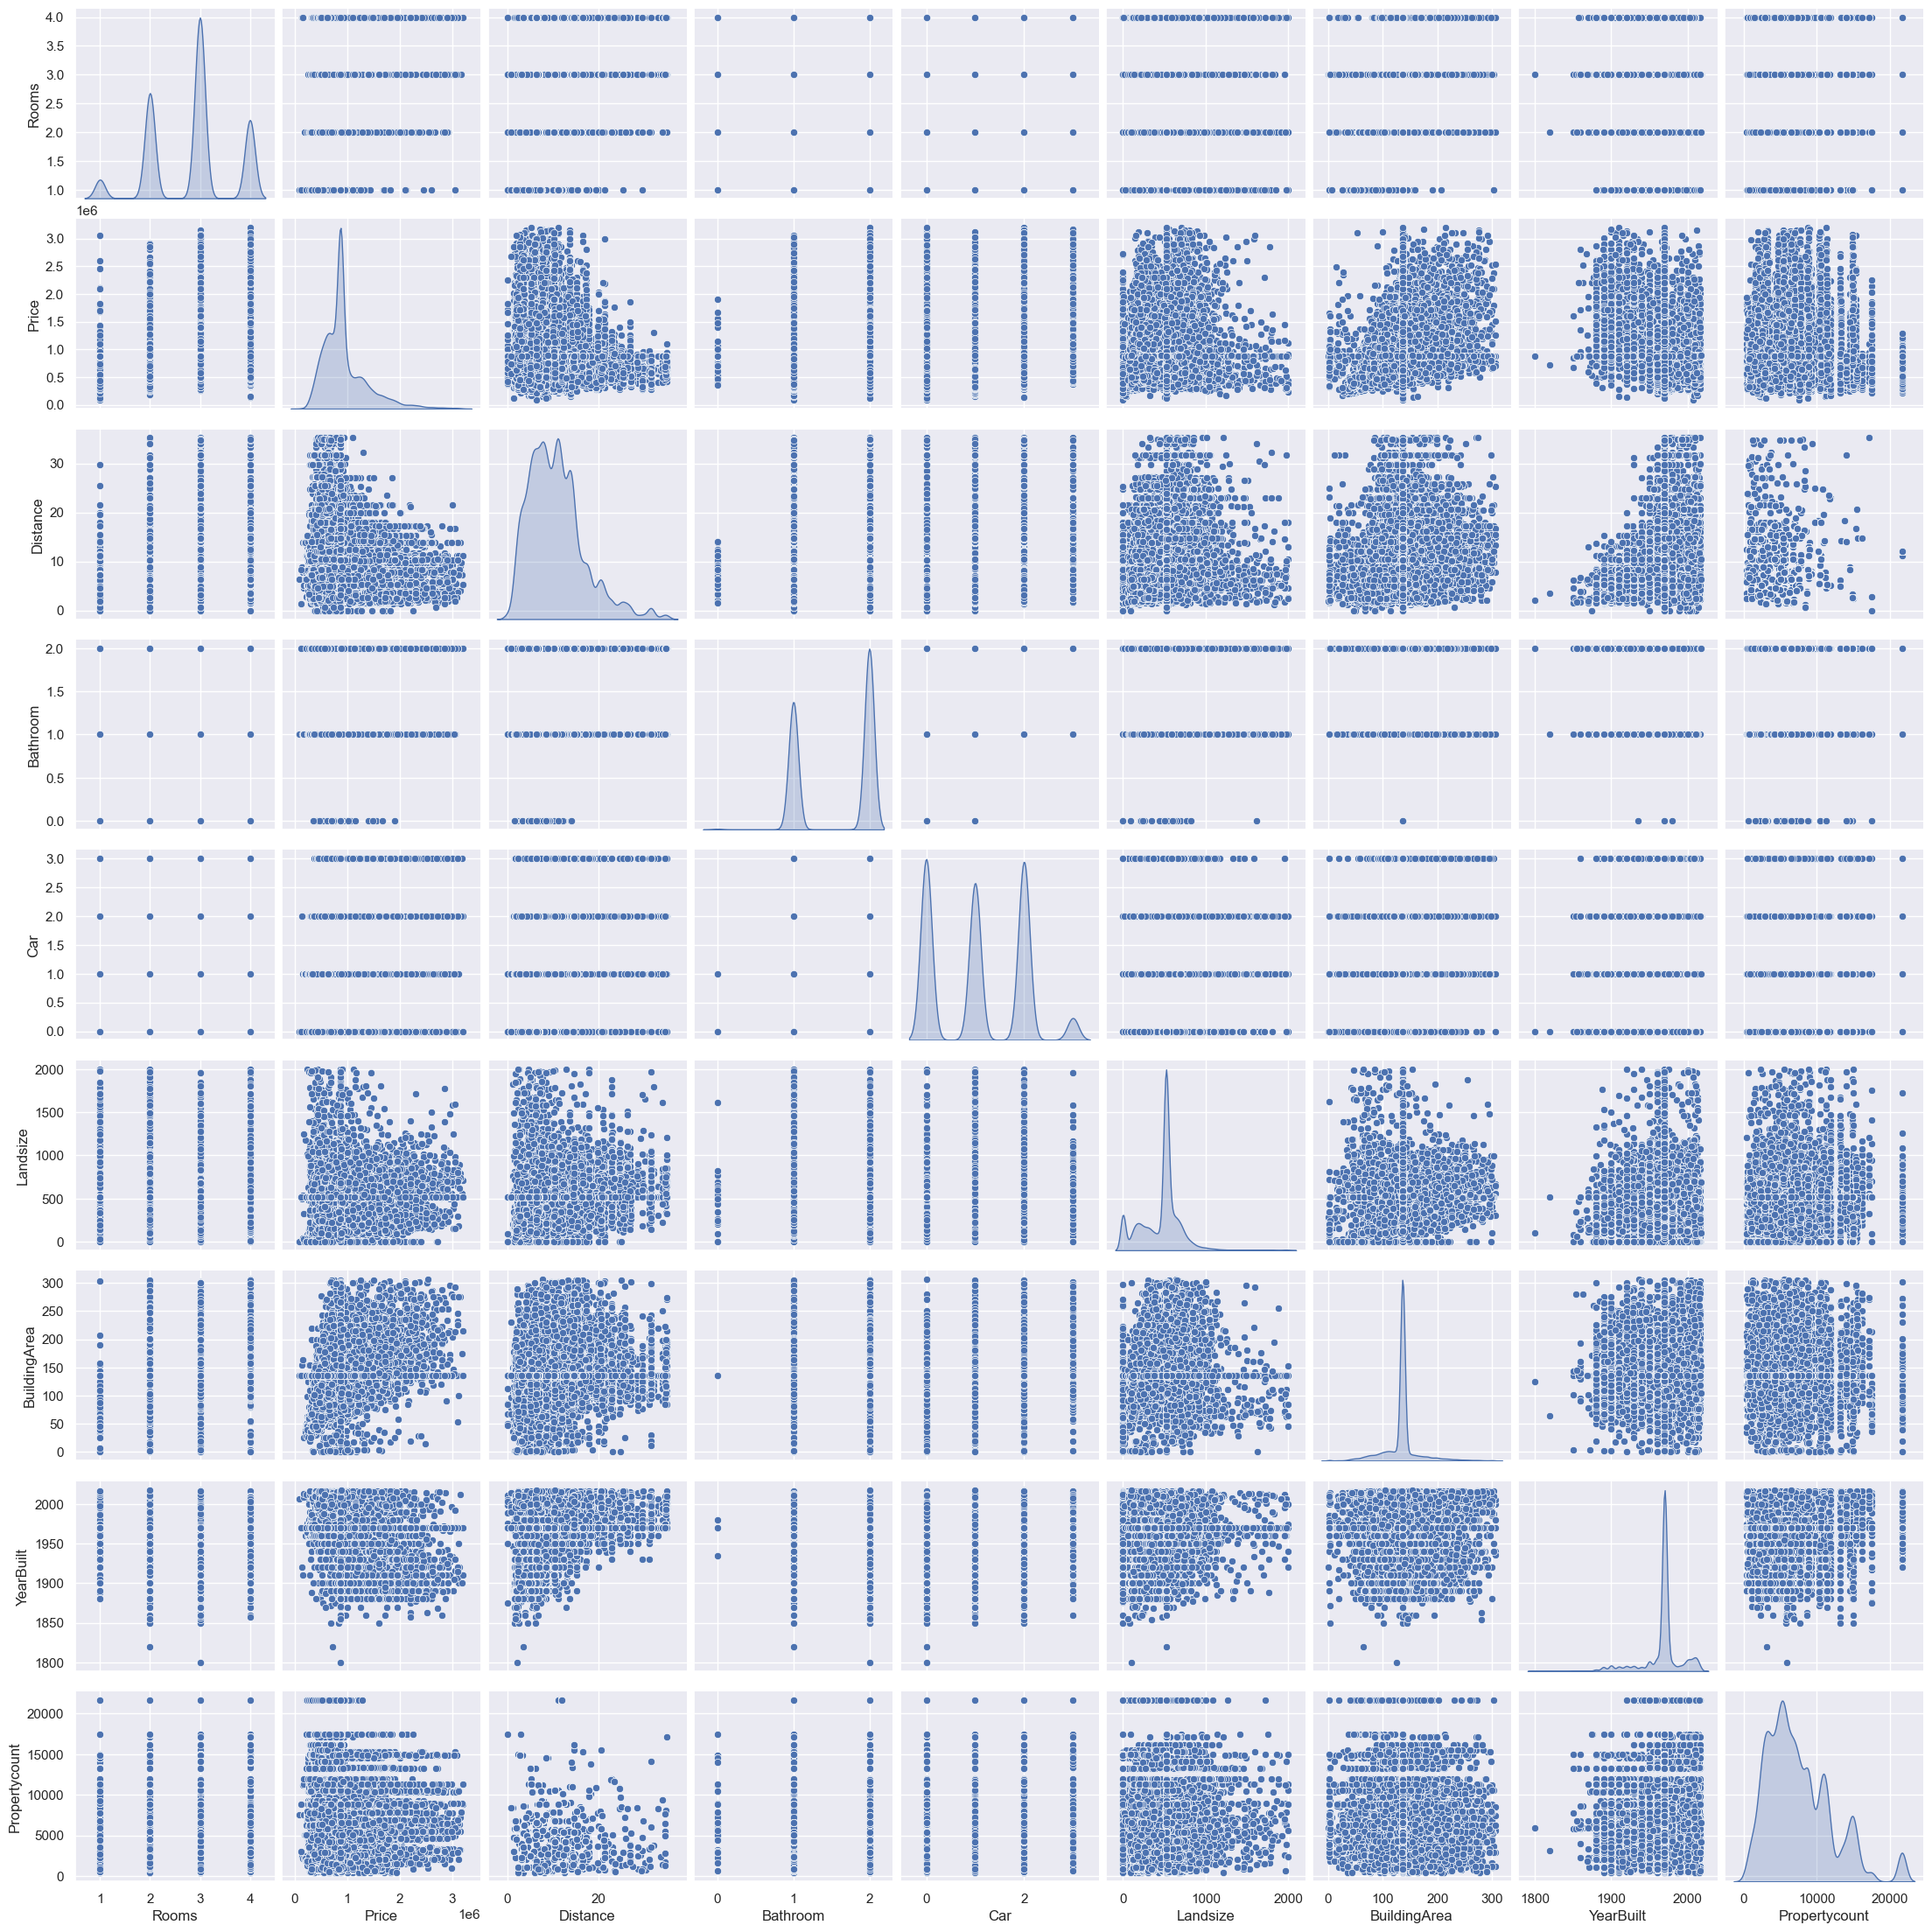

In [11]:
sns.pairplot(dataset[corr_columns], diag_kind="kde")

#### Heatmap

<Axes: >

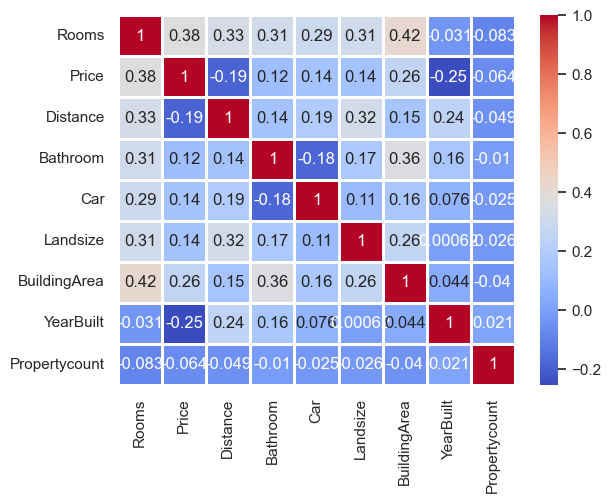

In [12]:
sns.heatmap(dataset[corr_columns].corr(), cmap="coolwarm", linewidth=1, annot=True)

### Transformation

As you can see, our `Price` data is not normally distributed. Thus, I want to transform it to deal with Linearity using Log Transformation

In [13]:
log_price = np.log(dataset['Price'])
dataset['log_price'] = log_price
dataset

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,log_price
0,Abbotsford,2,h,870000.0,SS,Jellis,2016-09-03,2.5,3067.0,1.0,1.0,126.0,136.0,1970.0,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0,13.676248
1,Abbotsford,2,h,1480000.0,S,Biggin,2016-12-03,2.5,3067.0,1.0,1.0,202.0,136.0,1970.0,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0,14.207553
2,Abbotsford,2,h,1035000.0,S,Biggin,2016-02-04,2.5,3067.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0,13.849912
3,Abbotsford,3,u,870000.0,VB,Rounds,2016-02-04,2.5,3067.0,2.0,1.0,0.0,136.0,1970.0,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0,13.676248
4,Abbotsford,3,h,1465000.0,SP,Biggin,2017-03-04,2.5,3067.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0,14.197366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29233,Yarraville,4,h,1480000.0,PI,Jas,2018-02-24,6.3,3013.0,1.0,3.0,593.0,136.0,1970.0,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0,14.207553
29234,Yarraville,2,h,888000.0,SP,Sweeney,2018-02-24,6.3,3013.0,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0,13.696727
29235,Yarraville,2,t,705000.0,S,Jas,2018-02-24,6.3,3013.0,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0,13.465953
29236,Yarraville,3,h,1140000.0,SP,hockingstuart,2018-02-24,6.3,3013.0,2.0,0.0,521.0,136.0,1970.0,Maribyrnong City Council,0.00000,0.00000,Western Metropolitan,6543.0,13.946539


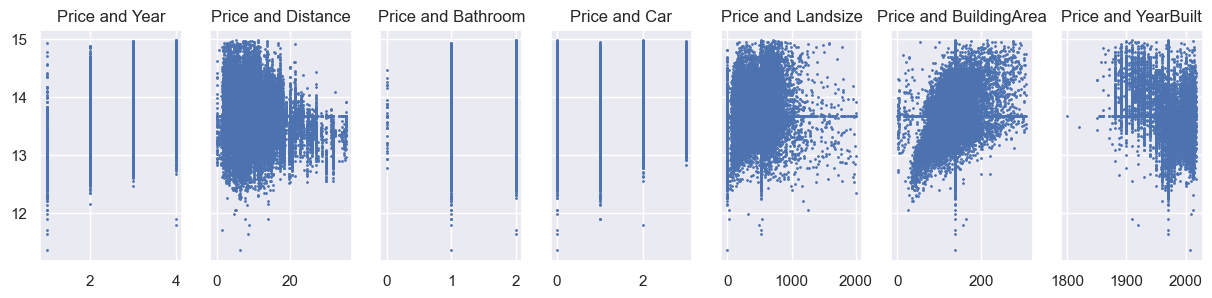

In [14]:
# Let's plot it again

# sharey -> share 'Price' as y
f, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(
    1, 7, sharey=True, figsize=(15, 3)
)

ax1.scatter(dataset["Rooms"], dataset["log_price"], s=1)
ax1.set_title("Price and Year")
ax2.scatter(dataset["Distance"], dataset["log_price"], s=1)
ax2.set_title("Price and Distance")
ax3.scatter(dataset["Bathroom"], dataset["log_price"], s=1)
ax3.set_title("Price and Bathroom")
ax4.scatter(dataset["Car"], dataset["log_price"], s=1)
ax4.set_title("Price and Car")
ax5.scatter(dataset["Landsize"], dataset["log_price"], s=1)
ax5.set_title("Price and Landsize")
ax6.scatter(dataset["BuildingArea"], dataset["log_price"], s=1)
ax6.set_title("Price and BuildingArea")
ax7.scatter(dataset["YearBuilt"], dataset["log_price"], s=1)
ax7.set_title("Price and YearBuilt")

plt.show()

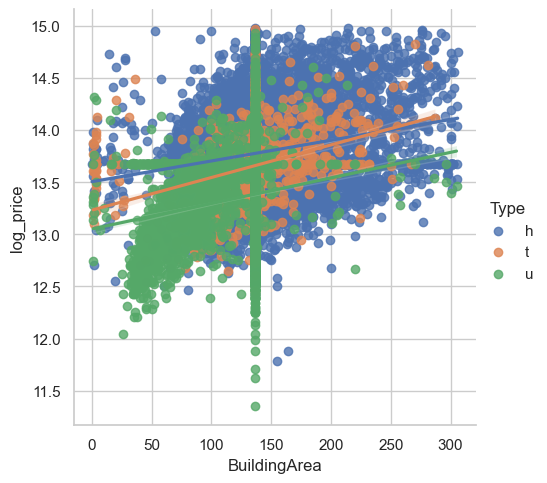

In [29]:
sns.lmplot(x="BuildingArea", y="log_price", data=dataset, hue="Type")

As you can see above, the Line of Regression with different x_axis doesn't fit the data. However, there's a feature that seems to be highly correlated with the data, which is the `BuildingArea`. In addition, we couldn't say much since we still didn't calculate the R-Squared and the Adj. R-Squared

In [16]:
# Removing Price column
dataset = dataset.drop(['Price'], axis=1)
dataset

,Suburb,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,log_price
0,Abbotsford,2,h,SS,Jellis,2016-09-03,2.5,3067.0,1.0,1.0,126.0,136.0,1970.0,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0,13.676248
1,Abbotsford,2,h,S,Biggin,2016-12-03,2.5,3067.0,1.0,1.0,202.0,136.0,1970.0,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0,14.207553
2,Abbotsford,2,h,S,Biggin,2016-02-04,2.5,3067.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0,13.849912
3,Abbotsford,3,u,VB,Rounds,2016-02-04,2.5,3067.0,2.0,1.0,0.0,136.0,1970.0,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0,13.676248
4,Abbotsford,3,h,SP,Biggin,2017-03-04,2.5,3067.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0,14.197366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29233,Yarraville,4,h,PI,Jas,2018-02-24,6.3,3013.0,1.0,3.0,593.0,136.0,1970.0,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0,14.207553
29234,Yarraville,2,h,SP,Sweeney,2018-02-24,6.3,3013.0,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0,13.696727
29235,Yarraville,2,t,S,Jas,2018-02-24,6.3,3013.0,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0,13.465953
29236,Yarraville,3,h,SP,hockingstuart,2018-02-24,6.3,3013.0,2.0,0.0,521.0,136.0,1970.0,Maribyrnong City Council,0.00000,0.00000,Western Metropolitan,6543.0,13.946539


## No Endogeneity

As it is shown above, the `Price` and `Distance` seem to be endogeneous. To deal with it, we could use **two-stage least squares (2SLS) regression**. However, I will just include it in our model and try to compare the model using the `Distance` and the model that isn't

## Homoscedasticity

This includes as follows:
- Normality
  - Our data is big, so we assumed that this data is normally distributed (Central Limit Theorem)
- Zero mean
  - Zero mean of the distribution errors is accomplished through the inclusion of the intercept in the regression
- Homoscedasticity
  - This data still implies heteroscedasticity, which makes the regression poor. This issue is caused by several factors such as non-linear data

## No Autocorrelation

Our data is not time series data or panel data, which means this data has already met this assumptions

## Multicollinearity

In [17]:
dataset.columns.values

array(['Suburb', 'Rooms', 'Type', 'Method', 'SellerG', 'Date', 'Distance',
       'Postcode', 'Bathroom', 'Car', 'Landsize', 'BuildingArea',
       'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude',
       'Regionname', 'Propertycount', 'log_price'], dtype=object)

It's logical that the `Rooms` and `Bathroom` ir correlated right? There's no `Bathroom` exceeding the number of `Rooms`. Other than that, the `Landsize` and the `BuildingArea` is also correlated (We don't took this relationship furthermore since there is also 'Zero-lot-line'). To check this issue, we could use VIF (Variance Inflation Factors) to measure how much larger the square root of the standard error of an estimate is.

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [19]:
continuous_columns = [
    "Distance",
    "Landsize",
    "BuildingArea",
    "YearBuilt",
]

In [20]:
variables = dataset[continuous_columns]

In [21]:
vif = pd.DataFrame()

In [22]:
vif["VIF"] = [
    variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])
]
vif["Features"] = variables.columns
vif

,VIF,Features
0,4.571698,Distance
1,5.394516,Landsize
2,20.140854,BuildingArea
3,20.382215,YearBuilt


As you can see above, the VIF of `BuildingArea` and `YearBuilt` seems to high, thus we need to drop it to make it not affecting the other variable VIF. However, there's some condition that we could ignore Multicollinearity, such as predicting analysis. Thus, we could ignore this VIF.

In [23]:
dataset.to_csv("MELBOURNE_CLEANED_OLS.csv", index=False)